In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Download ETH and BTC data on trading day 14 Apr 2023

In [17]:
ETH = yf.download('ETH-USD', start='2023-04-14', end='2023-04-15',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [18]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-14 00:00:00,2013.930664,2013.930664,2013.930664,2013.930664,2013.930664,0
2023-04-14 00:01:00,2013.618774,2013.618774,2013.618774,2013.618774,2013.618774,0
2023-04-14 00:02:00,2012.933228,2012.933228,2012.933228,2012.933228,2012.933228,0
2023-04-14 00:03:00,2012.848267,2012.848267,2012.848267,2012.848267,2012.848267,0
2023-04-14 00:04:00,2012.614502,2012.614502,2012.614502,2012.614502,2012.614502,872448
...,...,...,...,...,...,...
2023-04-14 23:52:00,2100.581543,2100.581543,2100.581543,2100.581543,2100.581543,1099776
2023-04-14 23:53:00,2101.160889,2101.160889,2101.160889,2101.160889,2101.160889,2866176
2023-04-14 23:54:00,2101.276855,2101.276855,2101.276855,2101.276855,2101.276855,0


In [19]:
ETH.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03
mean,2099.696811,2099.696811,2099.696811,2099.696811,2099.696811,6.511988e+06
std,21.943084,21.943084,21.943084,21.943084,21.943084,2.120263e+07
min,2011.503296,2011.503296,2011.503296,2011.503296,2011.503296,0.000000e+00
25%,2092.450684,2092.450684,2092.450684,2092.450684,2092.450684,0.000000e+00
50%,2106.708984,2106.708984,2106.708984,2106.708984,2106.708984,1.031168e+06
75%,2114.525635,2114.525635,2114.525635,2114.525635,2114.525635,6.213632e+06
max,2126.316650,2126.316650,2126.316650,2126.316650,2126.316650,4.067983e+08


In [20]:
BTC = yf.download('BTC-USD', start='2023-04-14', end='2023-04-15',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [21]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-14 00:00:00,30409.562500,30409.562500,30409.562500,30409.562500,30409.562500,0
2023-04-14 00:01:00,30407.447266,30407.447266,30407.447266,30407.447266,30407.447266,0
2023-04-14 00:02:00,30408.525391,30408.525391,30408.525391,30408.525391,30408.525391,0
2023-04-14 00:03:00,30412.544922,30412.544922,30412.544922,30412.544922,30412.544922,0
2023-04-14 00:04:00,30407.134766,30407.134766,30407.134766,30407.134766,30407.134766,24571904
...,...,...,...,...,...,...
2023-04-14 23:52:00,30457.978516,30457.978516,30457.978516,30457.978516,30457.978516,0
2023-04-14 23:53:00,30476.951172,30476.951172,30476.951172,30476.951172,30476.951172,4655104
2023-04-14 23:54:00,30478.492188,30478.492188,30478.492188,30478.492188,30478.492188,0


In [22]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03
mean,30604.479058,30604.479058,30604.479058,30604.479058,30604.479058,7.172096e+06
std,221.440164,221.440164,221.440164,221.440164,221.440164,1.676089e+07
min,30044.498047,30044.498047,30044.498047,30044.498047,30044.498047,0.000000e+00
25%,30429.896484,30429.896484,30429.896484,30429.896484,30429.896484,0.000000e+00
50%,30694.976562,30694.976562,30694.976562,30694.976562,30694.976562,1.441792e+06
75%,30791.320312,30791.320312,30791.320312,30791.320312,30791.320312,7.940096e+06
max,31005.607422,31005.607422,31005.607422,31005.607422,31005.607422,2.567168e+08


Text(0.5, 1.0, 'BTC (red) and ETH (blue) price movement on 14 Apr 2023')

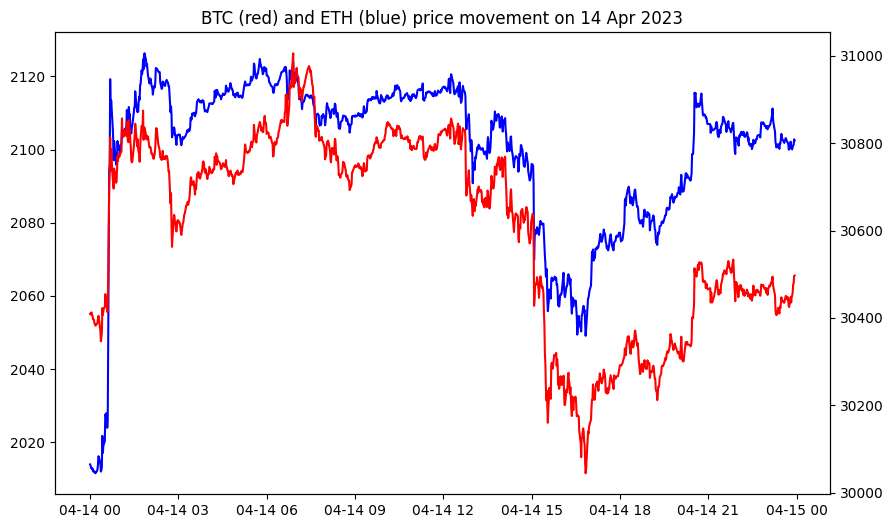

In [23]:
Eprice = ETH['Adj Close']
Bprice = BTC['Adj Close']

#Plotting pricemovement of ETH and BTC on 14 Apr 

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(Eprice, color = 'blue', label ='ETH-USD')
ax2.plot(Bprice, color = 'red', label ='BTC-USD')
plt.title('BTC (red) and ETH (blue) price movement on 14 Apr 2023')

### Download yesterday data 13 Apr 2023 of BTC and ETH for calibrating model coefficients

In [24]:
ETH1 = yf.download('ETH-USD', start='2023-04-13', end='2023-04-14',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [25]:
ETH1

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-13 00:00:00,1917.698364,1917.698364,1917.698364,1917.698364,1917.698364,0
2023-04-13 00:01:00,1918.471558,1918.471558,1918.471558,1918.471558,1918.471558,0
2023-04-13 00:02:00,1918.695679,1918.695679,1918.695679,1918.695679,1918.695679,0
2023-04-13 00:04:00,1919.011475,1919.011475,1919.011475,1919.011475,1919.011475,0
2023-04-13 00:05:00,1920.016724,1920.016724,1920.016724,1920.016724,1920.016724,1876992
...,...,...,...,...,...,...
2023-04-13 23:52:00,2012.036621,2012.036621,2012.036621,2012.036621,2012.036621,0
2023-04-13 23:53:00,2012.075439,2012.075439,2012.075439,2012.075439,2012.075439,0
2023-04-13 23:56:00,2012.051392,2012.051392,2012.051392,2012.051392,2012.051392,2711552


In [26]:
BTC1 = yf.download('BTC-USD', start='2023-04-13', end='2023-04-14',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [27]:
BTC1

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-13 00:00:00,29892.740234,29892.740234,29892.740234,29892.740234,29892.740234,0
2023-04-13 00:01:00,29905.982422,29905.982422,29905.982422,29905.982422,29905.982422,0
2023-04-13 00:02:00,29908.824219,29908.824219,29908.824219,29908.824219,29908.824219,0
2023-04-13 00:04:00,29914.119141,29914.119141,29914.119141,29914.119141,29914.119141,0
2023-04-13 00:05:00,29916.365234,29916.365234,29916.365234,29916.365234,29916.365234,11786240
...,...,...,...,...,...,...
2023-04-13 23:52:00,30386.515625,30386.515625,30386.515625,30386.515625,30386.515625,1304576
2023-04-13 23:53:00,30389.726562,30389.726562,30389.726562,30389.726562,30389.726562,0
2023-04-13 23:56:00,30402.447266,30402.447266,30402.447266,30402.447266,30402.447266,17145856


In [28]:
lr1 = np.log(ETH1['Adj Close'] / ETH1['Adj Close'].shift(1)) #log return ETH
lr2 = np.log(BTC1['Adj Close'] / BTC1['Adj Close'].shift(1)) #log return BTC
mu_1 = lr1.mean() * 1440 #Standardized return of ETH 
mu_2 = lr2.mean() * 1440 ##Standardized return of BTC
sigma_1 = lr1.std() * np.sqrt(1440) #Volatility of ETH
sigma_2 = lr2.std() * np.sqrt(1440) #Volatility of BTC
rho = lr1.corr(lr2)
z_0 = 0.000
gamma = 0.5
delta = 0.8
print('mu_1', mu_1, '\n' 
      'mu_2', mu_2, '\n'
     'sigma_1', sigma_1, '\n'
     'sigma_2', sigma_2, '\n'
     'rho', rho)

mu_1 0.05634910992271162 
mu_2 0.019672341180213493 
sigma_1 0.023595459878598957 
sigma_2 0.016186427635029997 
rho 0.7576671597231097


In [29]:
result = linregress(np.log(ETH1['Adj Close']), np.log(BTC1['Adj Close']))
beta = result.slope
print(beta)

0.19801542595251087


### Using BTC and ETH data of today 14 Apr 2023 for feedback control

In [30]:
S1_0 = ETH['Open'][0]
S2_0 = BTC['Open'][0]

In [31]:
T = 1
M = len(BTC)

dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [32]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn[t]);
    S1[t] = ETH['Adj Close'][t-1]
    S2[t] = BTC['Adj Close'][t-1]

Text(0.5, 1.0, 'BTC (blue) and ETH (red) price movement on 14 Apr 2023')

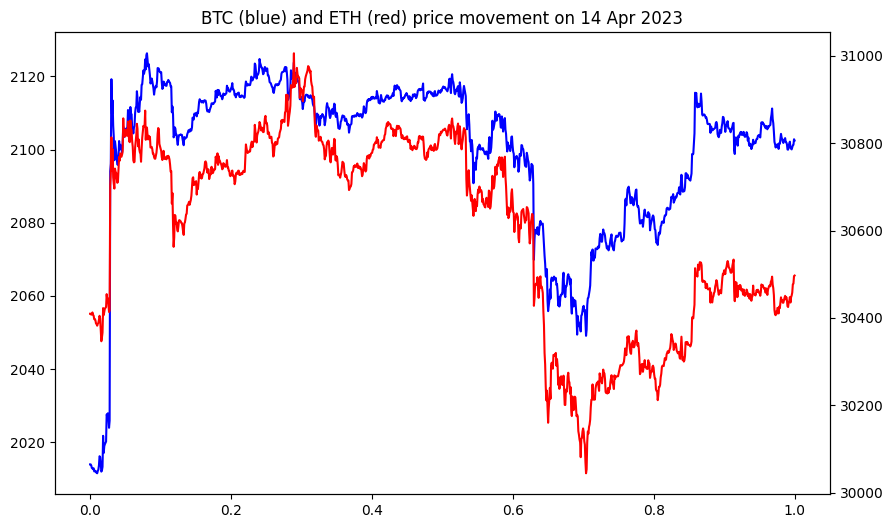

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(tt, S1 , color = 'blue', label ='BTC-USD')
ax2.plot(tt, S2 , color = 'red', label ='ETH-USD')
plt.title('BTC (blue) and ETH (red) price movement on 14 Apr 2023')

Text(0.5, 1.0, 'z')

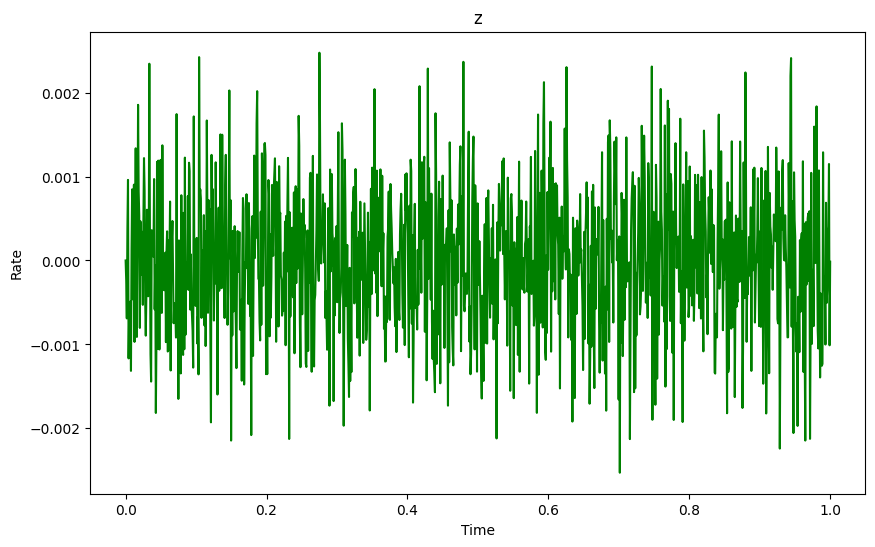

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

### Optimal trading weights

In [35]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

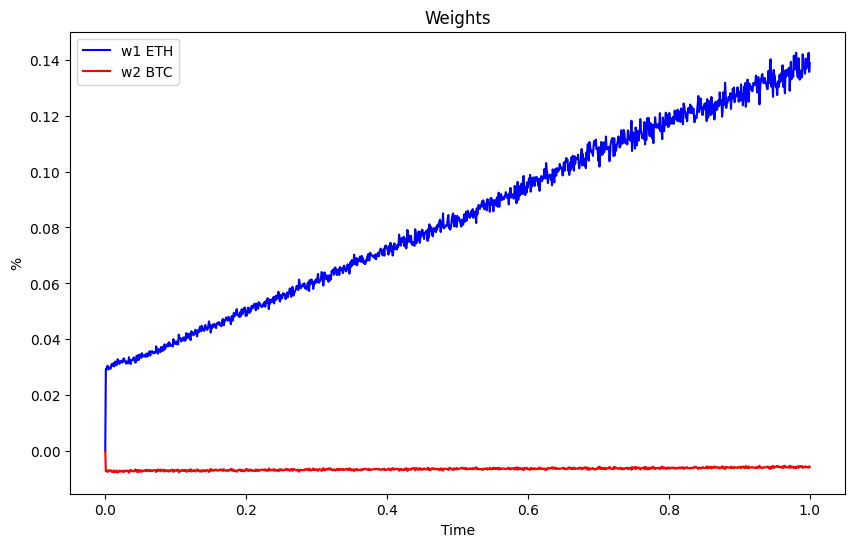

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1 ETH')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2 BTC')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

### Optimal wealths

Text(0.5, 1.0, 'Wealth')

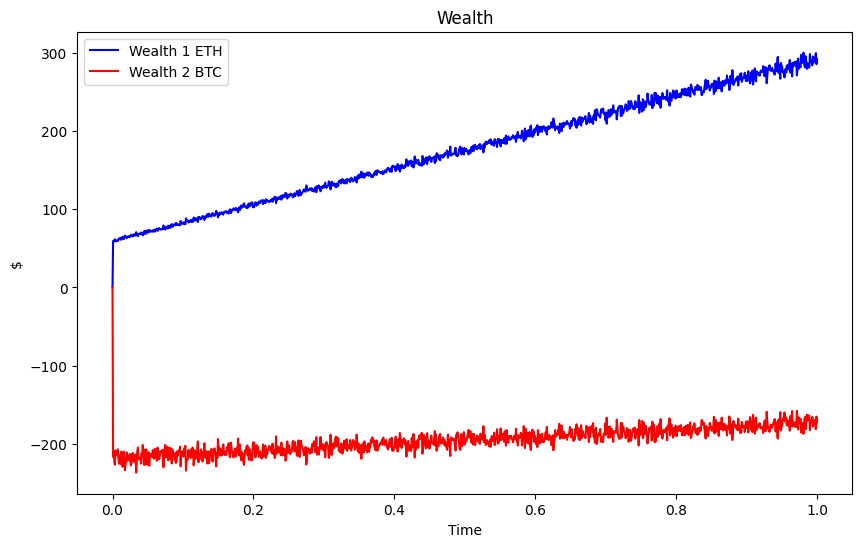

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1 ETH')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2 BTC')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

### Total wealth

In [38]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

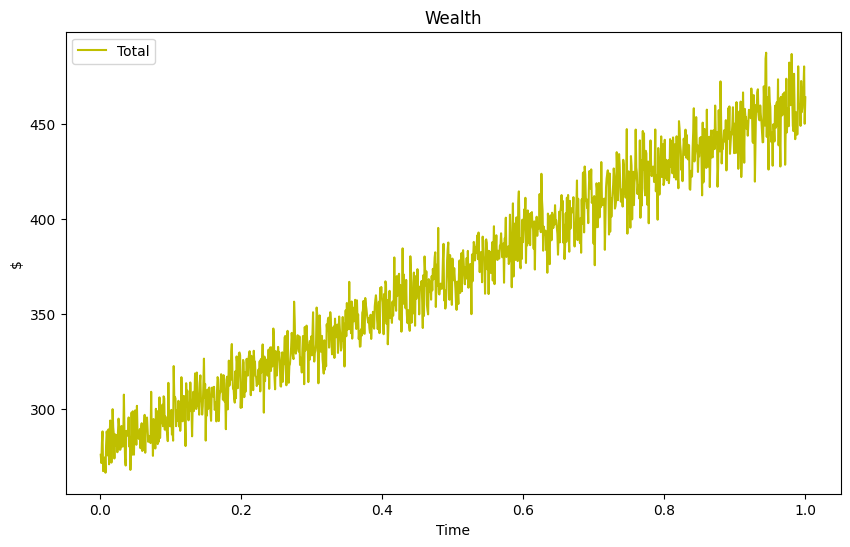

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'y', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [40]:
Wealth[1]   # Inital Wealth
Wealth[-1]  # Final Wealth
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()
print('Initial Wealth', Wealth[1], '\n'
     'Final Wealth', Wealth[-1], '\n'
     'Return', Return.item())

Initial Wealth [275.60685674] 
Final Wealth [464.06299101] 
Return 0.6837860875673286


### Comparision with static control pair

Pi_1 mean 0.08364531208923019 
Pi_2 mean -0.006376295304368422


Text(0.5, 1.0, 'Comparison')

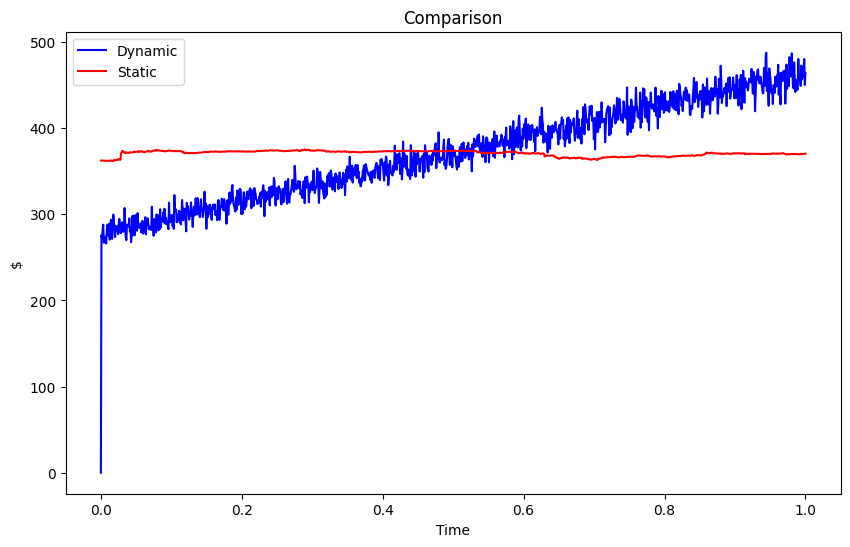

In [41]:
Pi_1.mean()
Pi_2.mean()
print('Pi_1 mean', Pi_1.mean(), '\n'
        'Pi_2 mean', Pi_2.mean())

plt.figure(figsize=(10, 6))
plt.plot(tt, abs(Pi_1 * S1) + abs(Pi_2 * S2), 'b', lw=1.5, label='Dynamic')
plt.plot(tt,  abs(Pi_1.mean() * S1) + abs(Pi_2.mean() * S2), 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')